In [7]:
!wget https://www.manythings.org/anki/rus-eng.zip && unzip rus-eng.zip

--2023-05-22 17:20:39--  https://www.manythings.org/anki/rus-eng.zip
Resolving www.manythings.org (www.manythings.org)... 173.254.30.110
Connecting to www.manythings.org (www.manythings.org)|173.254.30.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15460248 (15M) [application/zip]
Saving to: ‘rus-eng.zip’

rus-eng.zip         100%[===================>]  14.74M  26.8MB/s    in 0.6s    

2023-05-22 17:20:40 (26.8 MB/s) - ‘rus-eng.zip’ saved [15460248/15460248]

Archive:  rus-eng.zip
  inflating: rus.txt                 
  inflating: _about.txt              


In [8]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━

In [1]:
#№!pip install -U torchdata
#!pip install -U spacy
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm

2023-05-22 18:14:14.696861: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 18:14:16.290945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-22 18:14:19.862130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-22 18:14:19.862840: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [6]:
import torch
import yaml
from src.data import datamodule

if torch.cuda.is_available():
    DEVICE = "cuda"
else:
    DEVICE = 'cpu'

print("DEVICE: ", DEVICE)

data_config = yaml.load(open("configs/data_config.yaml", 'r'),   Loader=yaml.Loader)
dm = datamodule.DataManager(data_config, DEVICE)
train_dataloader, dev_dataloader = dm.prepare_data()

UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3

DEVICE:  cuda


Reading from file: 100%|██████████| 467119/467119 [00:06<00:00, 71727.27it/s]


Space tokenizer fitted - 3000 tokens
Space tokenizer fitted - 3000 tokens
2172
241


In [2]:
!chmod +x run_transformer.py

In [3]:
!pip install tokenizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!./run_transformer.py

Выходные данные были обрезаны до нескольких последних строк (5000).
 67% 1446/2172 [01:05<00:34, 20.79it/s]
 67% 1449/2172 [01:05<00:35, 20.31it/s]
 67% 1452/2172 [01:06<00:37, 19.21it/s]
 67% 1454/2172 [01:06<00:37, 19.35it/s]
 67% 1456/2172 [01:06<00:39, 18.10it/s]
 67% 1458/2172 [01:06<00:38, 18.43it/s]
 67% 1460/2172 [01:06<00:38, 18.58it/s]
 67% 1462/2172 [01:06<00:39, 17.97it/s]
 67% 1464/2172 [01:06<00:39, 17.96it/s]
 67% 1466/2172 [01:06<00:38, 18.37it/s]
 68% 1468/2172 [01:07<00:40, 17.52it/s]
 68% 1470/2172 [01:07<00:39, 17.86it/s]
 68% 1472/2172 [01:07<00:38, 18.16it/s]
 68% 1474/2172 [01:07<00:37, 18.56it/s]
 68% 1476/2172 [01:07<00:36, 18.84it/s]
 68% 1478/2172 [01:07<00:36, 19.03it/s]
 68% 1480/2172 [01:07<00:36, 19.09it/s]
 68% 1482/2172 [01:07<00:36, 19.10it/s]
 68% 1484/2172 [01:07<00:35, 19.32it/s]
 68% 1487/2172 [01:07<00:35, 19.52it/s]
 69% 1489/2172 [01:08<00:34, 19.59it/s]
 69% 1491/2172 [01:08<00:35, 19.08it/s]
 69% 1494/2172 [01:08<00:34, 19.46it/s]
 69% 1497/21

In [23]:
!cp src/model/inference_utils.py src/model/inf.py

In [16]:
from src.model.inference_utils import translate
from src.model.seq2seq_transformer import Seq2SeqTransformer

torch.manual_seed(0)

SRC_VOCAB_SIZE = len(dm.source_tokenizer.word2index)
TGT_VOCAB_SIZE = len(dm.target_tokenizer.word2index)
EMB_SIZE = 200
NHEAD = 8
FFN_HID_DIM = 200

NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

transformer = transformer.to(DEVICE)

transformer.load_state_dict(torch.load('transformer'))
transformer.eval()

Seq2SeqTransformer(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=200, out_features=200, bias=True)
          )
          (linear1): Linear(in_features=200, out_features=200, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=200, out_features=200, bias=True)
          (norm1): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerDecoderLayer(
          (self_attn): MultiheadAttent

In [24]:
from src.model.inference_utils import translate

In [33]:
import random

with open('rus.txt') as file:
  lines = file.read().splitlines()
ru_split, en_split = [], []
for i in range(10):
    line = random.choice(lines).split('\t')
    en_split.append(line[0])
    ru_split.append(line[1])

for i in range(10):
  #input_ids = tokenizer("translate English to Russian: " + en_split[i], return_tensors="pt").input_ids
  outputs = translate(transformer, en_split[i], dm, BOS_IDX, DEVICE, EOS_IDX)
  print("Predicted: " + " ".join(outputs[:20]))
  print("Target: " + ru_split[i])
  print("Source: " + en_split[i] + "\n")

#print(translate(transformer, "Hello", dm, BOS_IDX, DEVICE, EOS_IDX))

Predicted: и пере дали ся прави ло сразу и не про ли лось во зде й зде й зал ся и
Target: Я был вынужден принять решение здесь и сейчас.
Source: I had to decide right then and there.

Predicted: не обо спи тся поговорить с ме ло ей раз ным про дом ли ком про ми дом раз ом
Target: Я хотела бы поговорить с менеджером.
Source: I'd like to talk to the manager.

Predicted: пере ло пал и на ло вили не дорогу до кра льно раз ли ар це ной раз или и
Target: Это ужасно дорого.
Source: It's awfully expensive.

Predicted: испо л ни лось во до чно й не приня ли раз ное раз решение о сно вно сть е
Target: Переговоры начались.
Source: The negotiations have begun.

Predicted: пере вёл это за ло в про ход ное про ли ние не про е кт ное про дли тельно
Target: Я хочу, чтобы это было переведено на французский.
Source: I want to get this translated into French.

Predicted: смог прийти из об вышел на о ст ность из фа на льно сти про пал о не при хо
Target: Я рад, что у вас получилось прийти. Будьте добры, ч

In [39]:
train_loss_list, val_loss_list = [], []
with open('training_logs.txt', 'r') as file:
  for line in file:
      array = line.split(' ')
      if len(array) > 0:
          train_loss_list.append(array[4])
          val_loss_list.append(array[7])

In [40]:
train_loss_list, val_loss_list

(['1.293,',
  '0.681,',
  '0.543,',
  '0.476,',
  '0.432,',
  '0.400,',
  '0.376,',
  '0.357,',
  '0.341,',
  '0.328,',
  '0.317,',
  '0.307,',
  '0.298,',
  '0.291,',
  '0.284,',
  '0.278,',
  '0.272,',
  '0.268,',
  '0.263,',
  '0.259,',
  '0.255,',
  '0.251,',
  '0.248,',
  '0.245,',
  '0.242,',
  '0.239,',
  '0.237,',
  '0.235,'],
 ['2.040,',
  '1.671,',
  '1.505,',
  '1.421,',
  '1.359,',
  '1.325,',
  '1.291,',
  '1.267,',
  '1.255,',
  '1.237,',
  '1.234,',
  '1.224,',
  '1.219,',
  '1.213,',
  '1.210,',
  '1.202,',
  '1.205,',
  '1.205,',
  '1.200,',
  '1.202,',
  '1.201,',
  '1.201,',
  '1.202,',
  '1.204,',
  '1.203,',
  '1.203,',
  '1.204,',
  '1.202,'])

In [77]:
import matplotlib.pyplot as plt

%matplotlib inline

In [79]:
def plot_results(train_loss_list, val_loss_list, run_name):
    
    fig = plt.figure(figsize=(20, 20))
    plt.plot(list(range(len(train_loss_list))), train_loss_list, label='train loss')
    plt.plot(range(len(val_loss_list)), val_loss_list, label='val loss')
    #plt.set_xlabel('epoch')
    #plt.set_ylabel('loss')
    plt.legend()
    
    plt.suptitle(run_name, fontsize=20)
    plt.show()

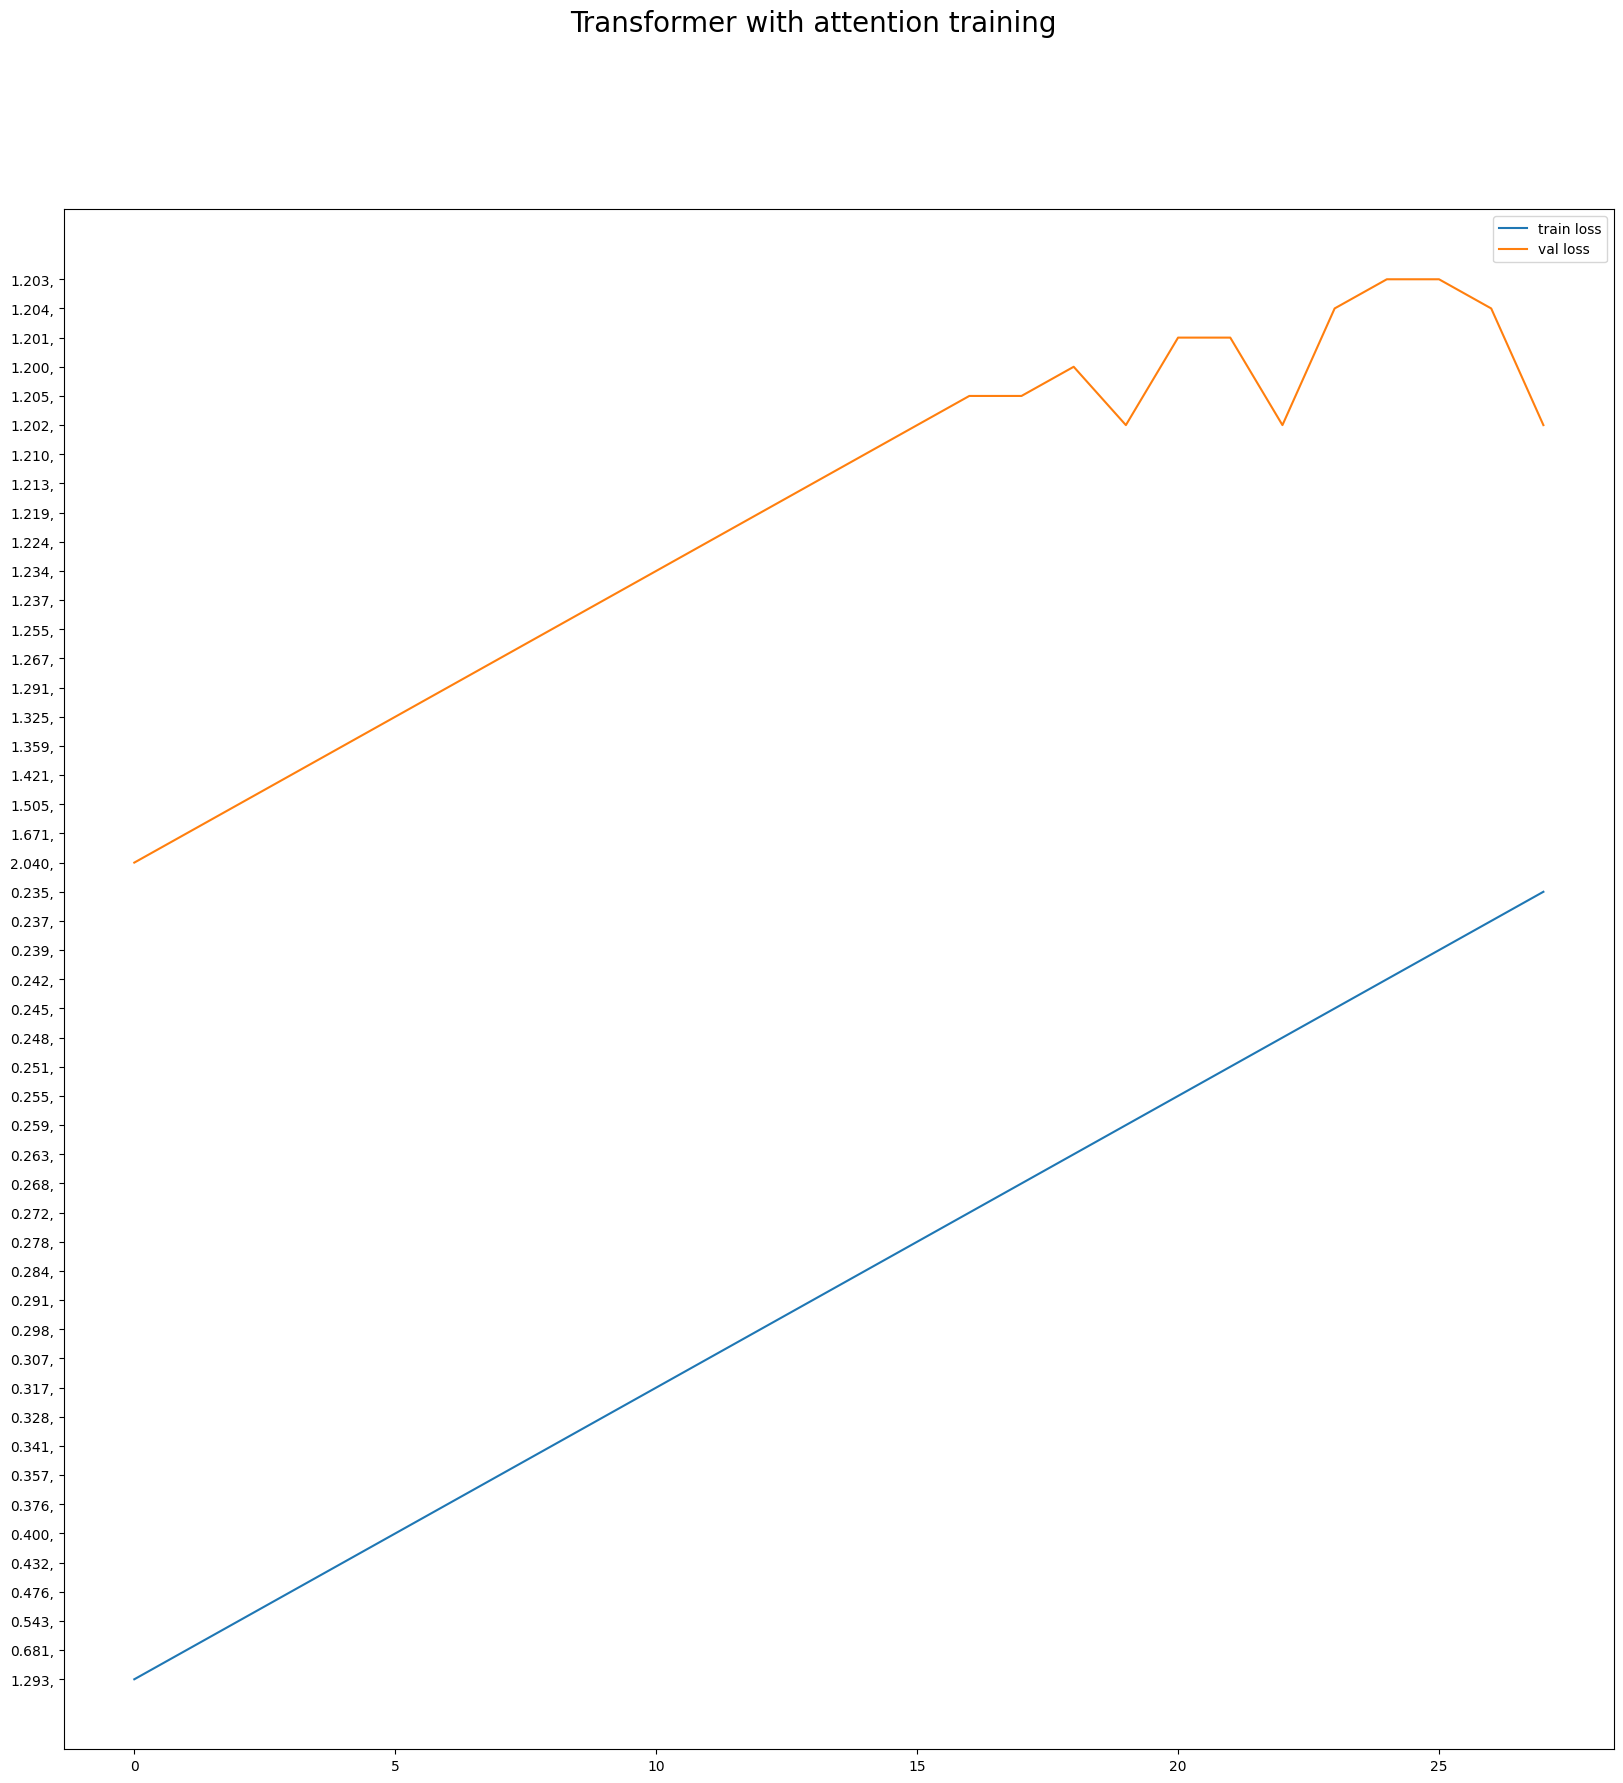

In [80]:
plot_results(train_loss_list, val_loss_list, run_name='Transformer with attention training')